### 1. Download the dataset MM-IMDB from https://www.kaggle.com/johnarevalo/datasets. Select 2000 images with drama label and 2000 with horror label. Be careful to exclude those images with both labels. Perform a 60%-20%-20% stratified split for training, validation and test datasets.
### 2. Use a fine tuning approach to train a ResNet50 network to discriminate between drama and horror movies.
### 3. Evaluate the model over the test dataset. Discuss the results.

In [39]:
import json
import os

# Define la ruta del directorio
dir_path = "/Users/cjimenezmanc/Downloads/mmimdb/dataset"

# Obtiene una lista de todos los archivos JSON en el directorio
json_files = [f for f in os.listdir(dir_path) if f.endswith('.json')]

# Carga los primeros 5 archivos JSON
for file in json_files[:5]:
    with open(os.path.join(dir_path, file), 'r') as f:
        data = json.load(f)
        print(file)
    print(data)

2675794.json
{'rating': 7.9, 'camera and electrical department': [{'canonical name': 'Chávez-Courtright, Nicola', 'name': 'Nicola Chávez-Courtright', 'long imdb name': 'Nicola Chávez-Courtright', 'long imdb canonical name': 'Chávez-Courtright, Nicola'}, {'canonical name': 'Egan, Ryan', 'name': 'Ryan Egan', 'long imdb name': 'Ryan Egan', 'long imdb canonical name': 'Egan, Ryan'}, {'canonical name': 'Graham, Andrew', 'name': 'Andrew Graham', 'long imdb name': 'Andrew Graham', 'long imdb canonical name': 'Graham, Andrew'}, {'canonical name': 'Graham, Andrew', 'name': 'Andrew Graham', 'long imdb name': 'Andrew Graham', 'long imdb canonical name': 'Graham, Andrew'}, {'canonical name': 'Lawless, Chris', 'name': 'Chris Lawless', 'long imdb name': 'Chris Lawless', 'long imdb canonical name': 'Lawless, Chris'}, {'canonical name': 'McDonagh, Dilila', 'name': 'Dilila McDonagh', 'long imdb name': 'Dilila McDonagh', 'long imdb canonical name': 'McDonagh, Dilila'}, {'canonical name': 'McDonagh, Dili

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score

# Define la ruta del directorio
dir_path = "/Users/cjimenezmanc/Downloads/mmimdb/dataset"

# Obtiene una lista de todos los archivos JSON en el directorio
json_files = [f for f in os.listdir(dir_path) if f.endswith('.json')]

# Lista para almacenar los archivos seleccionados y sus géneros
selected_files = []
selected_genres = []

# Contadores para cada género
drama_count = 0
horror_count = 0

# Itera sobre los archivos JSON
for file in json_files:
    # Abre y carga el archivo JSON
    with open(os.path.join(dir_path, file), 'r') as f:
        data = json.load(f)

    # Verifica si el campo "genres" contiene "Drama" o "Horror" pero no ambos
    if "Drama" in data["genres"] and "Horror" not in data["genres"] and drama_count < 1000:
        # Agrega el archivo a la lista de archivos seleccionados, dejamos Drama 0
        selected_files.append(file)
        selected_genres.append(0)
        drama_count += 1
    elif "Horror" in data["genres"] and "Drama" not in data["genres"] and horror_count < 1000:
        # Agrega el archivo a la lista de archivos seleccionados dejamos Horror 1
        selected_files.append(file)
        selected_genres.append(1)
        horror_count += 1

    # Detiene el proceso si se han seleccionado 2000 archivos
    if len(selected_files) == 2000:
        break

# Realiza la división estratificada de los datos
train_files, temp_files, train_genres, temp_genres = train_test_split(selected_files, selected_genres, test_size=0.4, stratify=selected_genres, random_state=42)
valid_files, test_files, valid_genres, test_genres = train_test_split(temp_files, temp_genres, test_size=0.5, stratify=temp_genres, random_state=42)

In [41]:
print(len(test_files))

400


In [42]:


# Define la ruta del directorio de imágenes
img_dir_path = "/Users/cjimenezmanc/Downloads/mmimdb/dataset"

# Listas para almacenar las imágenes de entrenamiento y prueba
train_images = []
test_images = []
valid_images = []

# Itera sobre los archivos de entrenamiento
for file in train_files:
    # Cambia la extensión del archivo a .jpeg
    img_file = os.path.splitext(file)[0] + '.jpeg'

    # Abre y carga la imagen
    img = Image.open(os.path.join(img_dir_path, img_file))

    # Asegúrate de que la imagen es en color
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Redimensiona la imagen para que todas tengan la misma forma
    img = img.resize((224, 224))

    # Convierte la imagen a un array de numpy y normaliza los valores de los píxeles
    img = np.array(img) / 255.0

    # Agrega la imagen a la lista de imágenes de entrenamiento
    train_images.append(img)

# Itera sobre los archivos de prueba
for file in test_files:
    # Cambia la extensión del archivo a .jpeg
    img_file = os.path.splitext(file)[0] + '.jpeg'

    # Abre y carga la imagen
    img = Image.open(os.path.join(img_dir_path, img_file))

    # Asegúrate de que la imagen es en color
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Redimensiona la imagen para que todas tengan la misma forma
    img = img.resize((224, 224))

    # Convierte la imagen a un array de numpy y normaliza los valores de los píxeles
    img = np.array(img) / 255.0

    # Agrega la imagen a la lista de imágenes de prueba
    test_images.append(img)
    
for file in valid_files:
    # Cambia la extensión del archivo a .jpeg
    img_file = os.path.splitext(file)[0] + '.jpeg'

    # Abre y carga la imagen
    img = Image.open(os.path.join(img_dir_path, img_file))

    # Asegúrate de que la imagen es en color
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Redimensiona la imagen para que todas tengan la misma forma
    img = img.resize((224, 224))

    # Convierte la imagen a un array de numpy y normaliza los valores de los píxeles
    img = np.array(img) / 255.0

    # Agrega la imagen a la lista de imágenes de prueba
    valid_images.append(img)

# Convierte las listas de imágenes a arrays de numpy
train_images = np.array(train_images)
test_images = np.array(test_images)
valid_images = np.array(valid_images)

/Users/cjimenezmanc/miniconda3/envs/machine_learning2024/lib/python3.9/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/cjimenezmanc/miniconda3/envs/machine_learning2024/lib/python3.9/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (97212000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


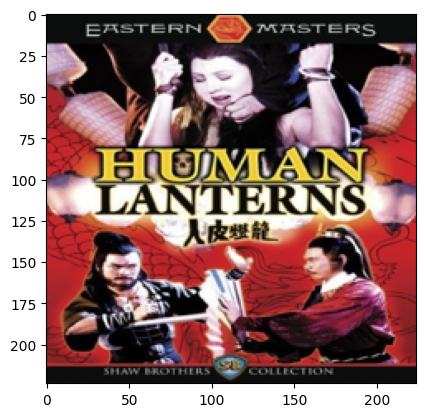

In [43]:

# Imprime la primera imagen de entrenamiento
plt.imshow(train_images[0])
plt.show()

In [45]:

# Convierte train_genres, test_genres y valid_genres a arrays de numpy
train_genres = np.array(train_genres)
test_genres = np.array(test_genres)
valid_genres = np.array(valid_genres)

# Ahora puedes verificar el tipo de datos
print("Train genres dtype:", train_genres.dtype)
print("Test genres dtype:", test_genres.dtype)
print("Valid genres dtype:", valid_genres.dtype)

Train genres dtype: int64
Test genres dtype: int64
Valid genres dtype: int64


In [48]:

# Carga el modelo ResNet50 con pesos preentrenados en ImageNet
base_model = ResNet50(weights='imagenet')

# Reemplaza la última capa del modelo base con una nueva capa Dense
output = Dense(1, activation='sigmoid')(base_model.layers[-2].output)

# Crea un nuevo modelo que incluya la nueva capa de salida
model = Model(inputs=base_model.input, outputs=output)

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(train_images, train_genres, epochs=10)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.6021 - loss: 1.0100
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.6192 - loss: 0.7400
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.6544 - loss: 0.6364
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.6603 - loss: 0.6164
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.6718 - loss: 0.6165
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7532 - loss: 0.5316
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.7475 - loss: 0.5615
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.8006 - loss: 0.4751
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2106s 28s/step - accuracy: 0.8145 - loss: 0.4377
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8439 - loss: 0.3693


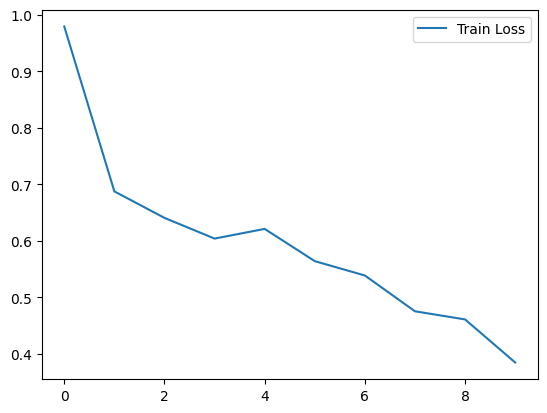

In [49]:

# Grafica la pérdida en el conjunto de entrenamiento
plt.plot(history.history['loss'], label='Train Loss')

# Muestra la leyenda
plt.legend()

# Muestra la gráfica
plt.show()

In [50]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_genres)

print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 558ms/step - accuracy: 0.5240 - loss: 0.6913
Test Loss:  0.7091019153594971
Test Accuracy:  0.5099999904632568


In [51]:
# Imprime la precisión de entrenamiento
train_accuracy = history.history['accuracy']
print("Train Accuracy: ", train_accuracy)

Train Accuracy:  [0.6100000143051147, 0.6433333158493042, 0.6508333086967468, 0.6741666793823242, 0.6808333396911621, 0.7408333420753479, 0.7483333349227905, 0.7833333611488342, 0.7975000143051147, 0.8316666483879089]


In [52]:
# Evalúa el modelo en el conjunto de validación
valid_loss, valid_accuracy = model.evaluate(valid_images, valid_genres)

print("Validation Loss: ", valid_loss)
print("Validation Accuracy: ", valid_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - accuracy: 0.5362 - loss: 0.6868
Validation Loss:  0.6960591077804565
Validation Accuracy:  0.5149999856948853


In [53]:


# Obtiene las predicciones de probabilidad del modelo para el conjunto de prueba
test_predictions = model.predict(test_images)

# Calcula el AUC de la curva ROC
test_auc = roc_auc_score(test_genres, test_predictions)

print("Test AUC: ", test_auc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 592ms/step
Test AUC:  0.639675


In [55]:


# Carga el modelo ResNet50 con pesos preentrenados en ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Crea un nuevo modelo secuencial
model = Sequential()

# Añade el modelo base
model.add(base_model)

# Añade nuevas capas
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(train_images, train_genres, epochs=10, validation_data=(valid_images, valid_genres))

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.5610 - loss: 11.0335 - val_accuracy: 0.5000 - val_loss: 1413927.5000
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.6783 - loss: 0.6469 - val_accuracy: 0.5000 - val_loss: 3242.1016
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.6846 - loss: 0.5999 - val_accuracy: 0.5000 - val_loss: 0.7493
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.7544 - loss: 0.5826 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.7661 - loss: 0.5536 - val_accuracy: 0.5175 - val_loss: 0.6920
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7542 - loss: 0.5084 - val_accuracy: 0.5200 - val_loss: 0.6930
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.8480 - loss: 0.4587 - val_accuracy: 0.5000 - val_loss: 275.3725
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.8675 - loss: 0.3646 - val_accuracy

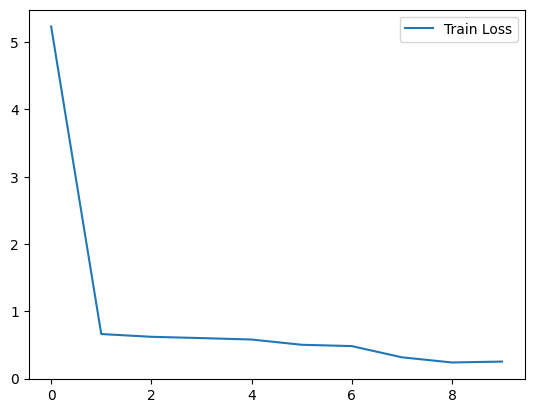

In [56]:
# Grafica la pérdida en el conjunto de entrenamiento
plt.plot(history.history['loss'], label='Train Loss')

# Muestra la leyenda
plt.legend()

# Muestra la gráfica
plt.show()

In [57]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_genres)

print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 550ms/step - accuracy: 0.4813 - loss: 0.8100
Test Loss:  0.7938213348388672
Test Accuracy:  0.4975000023841858


In [58]:

# Obtiene las predicciones de probabilidad del modelo para el conjunto de prueba
test_predictions = model.predict(test_images)

# Calcula el AUC de la curva ROC
test_auc = roc_auc_score(test_genres, test_predictions)

print("Test AUC: ", test_auc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 616ms/step
Test AUC:  0.47222499999999995
